# <strong><font color="2973B2">TelecomX: Análise de perfil Churn</font></strong>


---


**Problema de negócio:**

A empresa enfrenta um alto índice de cancelamentos(Churn) e quer identificar as categorias com maiores índices de Churn, e padrões que possam contribuir para prever ou reduzir a saída dos futuros clientes. Ao analisar o perfil, serviços e comportamentos, busco gerar insights acionáveis para retenção.

**Desafio:**

Extrair os dados da base e construir visuais que possam agregar valor a apresentação dos resultados da empresa. Para isso, serão repassados ao todo **X questionamentos** que foram separados para que você possa contribuir na construção do storytelling das vendas da empresa.

## **1.1 - Obtendo os dados**

---

Link do repositório com a base utilizada no projeto:

In [382]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# import requests
# response = requests.get(url_clientes)
# data_clientes = json.load(response.text)
# clientes = pd.DataFrame(data_clientes)

In [4]:
url_clientes = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [195]:
# clientes = pd.read_json('/content/TelecomX_Data.json')

clientes = pd.read_json(url_clientes)

In [6]:
# Obtendo informações gerais sobre o DataFrame (tipos de dados e valores não nulos)

clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


## **1.2 - Entendendo os dados**

---

Explorar os dados compreendendo o que significam e como pode relacionar na construção dos visuais.

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Sou analista de dados de um empresa de telecomunicação. Recebi uma base de dados com os dados dos clientes e vendas.

Quero explorar a base clientes no formato de um DataFrame, chamado "clientes". Ela contém dados dos clientes que realizaram contrataram a empresa, sendo eles: customerID, Churn, customer, phone, internet e account. As colunas 'customer', 'phone', 'internet', e 'account' contêm dicionários.

Quero fazer uma breve exploração dos dados para compreender um pouco sobre eles. Os dados desta base não estão limpos e tratados. Preciso que seja feito limpeza e tratamento em cada coluna, de acordo com o seu tipo.Construa um código para executar esta etapa usando o Python.

Não é necessário utilizar "print()" para mostrar o resultado das consultas.

In [196]:
# Visualizar as primeiras linhas

clientes.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [197]:
# Função para Limpar as respostas Yes/No:
# ==========================================

def limpar_yes_no(valor):
    if pd.isna(valor):
        return "No"

    valor = str(valor).strip().lower()

    if valor == "yes":
        return "Yes"
    elif valor == "no":
        return "No"
    else:
        return "No"

In [198]:
clientes = pd.read_json(url_clientes)
# Normalização de colunas aninhadas
# ===================================
clientes_customer = pd.json_normalize(clientes['customer'])
clientes_phone = pd.json_normalize(clientes['phone'])
clientes_internet = pd.json_normalize(clientes['internet'])
clientes_account = pd.json_normalize(clientes['account'])

## **1.3 - Tratando os dados**

---


### **customerID**

---

In [199]:
# customerID
# Garantir que é string

clientes['customerID'] = clientes['customerID'].astype("object")

# Remover duplicados
clientes.drop_duplicates(subset='customerID', inplace=True)

### **Churn**

---

In [200]:
# Churn
# Padronizar valores

clientes['Churn'] = (clientes['Churn'].replace({'yes': 'Yes', 'no': 'No', 'Y': 'Yes', 'N': 'No'}))

# Substituir valores vazios, None e NaN por 'No'
clientes['Churn'] = (clientes['Churn'].replace(['', ' ', None], np.nan).fillna('No'))

# Converter para categoria
clientes['Churn'] = clientes['Churn'].astype('category')

### **clientes_customer**

---

In [28]:
clientes_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   object
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 284.0+ KB


In [202]:
# clientes_customer

#clientes_customer['SeniorCitizen'] = (clientes_customer['SeniorCitizen'].map({1: 'Yes', 0: 'No'}).astype('object'))

# Converter 'SeniorCitizen' para string antes de substituir
clientes_customer["SeniorCitizen"] = clientes_customer["SeniorCitizen"].astype(str)

# Agora substituir '1' por 'Yes' e '0' por 'No'
clientes_customer["SeniorCitizen"] = (clientes_customer["SeniorCitizen"].replace({"1": "Yes", "0": "No"}))

# Opcional: converter para tipo 'category'
#clientes_customer["SeniorCitizen"] = clientes_customer["SeniorCitizen"].astype("object")

# Visualizar valores únicos (não causava o erro, apenas para inspeção)
clientes_customer.apply(pd.unique)

# Exibir contagens de valores para as colunas selecionadas
clientes_customer[["gender", "SeniorCitizen", "Partner","Dependents"]].apply(lambda col: col.value_counts())

#print(clientes_customer['SeniorCitizen'].dtypes)



,gender,SeniorCitizen,Partner,Dependents
Female,3592.0,NaN,NaN,NaN
Male,3675.0,NaN,NaN,NaN
No,NaN,6085.0,3749.0,5086.0
Yes,NaN,1182.0,3518.0,2181.0


In [30]:
clientes_customer["tenure"] = pd.to_numeric(clientes_customer["tenure"], errors="coerce")

In [31]:
# Esses dois ´codigos irão ser recolocados
clientes.drop(columns=["customer", "phone", "internet", "account"],inplace=True) #, errors='ignore'
clientes = pd.concat([clientes, clientes_customer, clientes_phone, clientes_internet, clientes_account ], axis = 1)

# Garantir filtragem correta + bins válidos
clientes_churn = clientes.loc[
    clientes['Churn'] == 'Yes',
    ['tenure']
].copy()

bins = [0, 6, 12, 24, 48, clientes_churn['tenure'].max()]
labels = [
    '0–6 meses',
    '7–12 meses',
    '13–24 meses',
    '25–48 meses',
    '49+ meses'
]

clientes_churn['faixa'] = pd.cut(
    clientes_churn['tenure'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Agrupar e eliminar possíveis NaNs
churn_por_faixa = (clientes_churn.dropna(subset=['faixa']).groupby('faixa').size().reset_index(name='Quantidade')
)

# Converter explicitamente faixa para string
churn_por_faixa['faixa'] = churn_por_faixa['faixa'].astype(str)

KeyError: "['customer', 'phone', 'internet', 'account'] not found in axis"

### **clients_phone**

---

In [44]:
# Aplicar a função limpar_yes_no em todas as colunas de clientes_phone
for col in clientes_phone.columns:
    clientes_phone[col] = clientes_phone[col].apply(limpar_yes_no)

# Exibir valores únicos e suas contagens após a limpeza
clientes_phone.apply(pd.unique)
clientes_phone.apply(lambda col: col.value_counts())

,PhoneService,MultipleLines
No,707,4202
Yes,6560,3065


### **clients_internet**

---

In [45]:
# clientes_internet

clientes_internet.apply(pd.unique)

clientes_internet = clientes_internet.replace("No internet service", "No")

clientes_internet.apply(lambda col: col.value_counts())

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
DSL,2488.0,NaN,NaN,NaN,NaN,NaN,NaN
Fiber optic,3198.0,NaN,NaN,NaN,NaN,NaN,NaN
No,1581.0,5189.0,4763.0,4776.0,5163.0,4477.0,4451.0
Yes,NaN,2078.0,2504.0,2491.0,2104.0,2790.0,2816.0


### **clients_account**

---

Verificar se existem valores vazios

In [46]:
# clientes_account

# clientes_account.nunique()
clientes_account.apply(pd.unique)
#clientes_account.apply(lambda col: col[~col.isin(["Yes", "No"])].unique())
# clientes_account.apply(lambda col: col.value_counts())

,0
Contract,"[One year, Month-to-month, Two year]"
PaperlessBilling,"[Yes, No]"
PaymentMethod,"[Mailed check, Electronic check, Credit card (..."
Charges.Monthly,"[65.6, 59.9, 73.9, 98.0, 83.9, 69.4, 109.7, 84..."
Charges.Total,"[593.3, 542.4, 280.85, 1237.85, 267.4, 571.45,..."


In [47]:
clientes_account["Contract"].value_counts()

,count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [48]:
clientes_account["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [49]:
clientes_account["Charges.Monthly"].isna().any()

#verificar strings vazias (caso coluna continue object)
(clientes_account["Charges.Monthly"].isna() | (clientes_account["Charges.Monthly"].astype(str).str.strip() == "")).sum()

#verificar strings vazias (caso coluna numérica)
clientes_account["Charges.Monthly"].dtype

clientes_account["Charges.Monthly"] = pd.to_numeric(clientes_account["Charges.Monthly"],errors="coerce")
clientes_account["Charges.Monthly"].isna().sum()

np.int64(0)

In [50]:
clientes_account["Charges.Total"].isna().any()

#verificar strings vazias (caso coluna continue object)
(clientes_account["Charges.Total"].isna() | (clientes_account["Charges.Total"].astype(str).str.strip() == "")).sum()

#verificar strings vazias (caso coluna numérica)
clientes_account["Charges.Total"].dtype

clientes_account["Charges.Total"] = pd.to_numeric(clientes_account["Charges.Total"],errors="coerce")
clientes_account["Charges.Total"].isna().sum()

np.int64(11)

In [51]:
clientes_account["Charges.Monthly"] = pd.to_numeric(clientes_account["Charges.Monthly"], errors="coerce")

clientes_account["Charges.Total"] = pd.to_numeric(clientes_account["Charges.Total"], errors="coerce")

## **1.4 - Tipos de gráficos**

---


> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Quero iniciar a etapa da geração dos visuais que possam auxiliar na análise do índice de Churn avaliando o perfil dos clientes, do dataframe "clientes_customer", os serviços contratados através do dataframe "clientes_internet", o intervalo de tenure em que ocorre maior índice de Churn do dataframe original "clientes", o gasto mensal com maior índice de Churn através do dataframe "clientes_account['Charges.Monthly'] "e outros dados que possam ser relevantes à análise e construção do nosso storytelling.

As colunas de "clientes" são:
```
customerID: object
Churn: object
gender : object
SeniorCitizen: int64
Partner: object
Dependents: object
tenure: int64
PhoneService: object
MultipleLines: object
InternetService: object
OnlineSecurity: object
OnlineBackup: object
DeviceProtection: object
TechSupport: object
StreamingTV : object
StreamingMovies: object
Contract: object
PaperlessBilling: object
PaymentMethod : object
Charges.Monthly: float64
Charges.Total: float64
```





O objetivo é abstrair e buscar relações para construir visuais interessantes para a análise dos dados da TelecomX. Com base nas informações fornecidas, quais tipos de visualizações seriam úteis para atingir o objetivo de analisar os dados?

### ***Sugestões***:

1️⃣ **Visuais para entender quem são os clientes com Churn**

(perfil demográfico e relacional – dataframe clientes_customer / colunas de perfil)

🔹 Gráficos Barplot (proporção ou taxa de churn) por:

gender | SeniorCitizen | Partner | Dependents

**Mostra rapidamente quais perfis têm maior risco de evasão.**

🔹 Heatmap de churn por perfil

Linhas: SeniorCitizen

Colunas: Partner ou Dependents

Valores: taxa de churn


2️⃣ **Visuais sobre serviços contratados e churn**

(dataframe clientes_internet + colunas de serviços)

🔹 Barplots horizontais (melhor leitura)

Churn por tipo de serviço: InternetService | PhoneService | MultipleLines

🔹 Barplot com taxa de churn (Yes/No)

Serviços adicionais vs churn

**Mostra claramente se serviços agregados reduzem o churn.**

🔹 Heatmap de serviços

Linhas: serviços (OnlineSecurity, TechSupport…)

Colunas: Churn

Valores: proporção

**Ótimo para storytelling visual: rápido, direto e impactante.**

3️⃣ **Visuais de tenure (tempo de permanência)**

(dataframe clientes)

🔹 Histograma: Distribuição de tenure

Separado por Churn (cores)

**Pergunta respondida: Clientes churnam mais no início ou depois de muito tempo?**

🔹 Barplot da taxa de churn por faixa: Churn por faixa de tenure

Crie faixas:

0–6 meses | 7–12 | 13–24 | 25–48 | 49+


4️⃣ **Visuais de gasto mensal e churn**

(coluna clientes_account['Charges.Monthly'])

🔹 Boxplot ou violin plot: Distribuição do gasto mensal
Separando Churn = Yes / No

**Perguntas respondidas: Clientes que churnam pagam mais? Ou churn ocorre em clientes de menor ticket?**

🔹 Barplot da taxa de churn por faixa: Churn por faixa de gasto mensal

Criar bins de gasto:

Baixo | Médio | Alto


5️⃣ **Contrato, cobrança e pagamento**

🔹 Barplot de taxa de churn: Churn por tipo de contrato

Contract (Month-to-month, One year, Two year)

Visual essencial

🔹 Barplot simples: Churn por método de pagamento

PaymentMethod


6️⃣ **Visuais combinados**

🔹 Tenure × Contrato × Churn

Boxplot de tenure por Contract, separado por Churn

🔹 Charges.Monthly × InternetService × Churn

Boxplot ou swarmplot


**7️⃣ Sequência sugerida para o storytelling**

Apresentar como relatório:

Visão geral do churn

Perfil dos clientes que churnam

Serviços e valor percebido

Tenure e momento crítico de evasão

Impacto financeiro (Charges.Monthly)

Contratos e métodos de pagamento

Insights acionáveis

# <strong><font color="2973B2">Visualizando os dados</font></strong>

## **2.1 - Definindo os visuais**

---


Após a etapa de exploração dos dados, levantei alguns questionamentos para começaremos a pensar nos visuais que irei construir para basear o relatório de análise.

### **Questionamentos**

#### Perfil dos clientes

1.   Qual a quantidade de clientes com Churn?
2.   Qual é o perfil dos clientes que tem Churn Yes?

#### Vendas

3.   O tenure impacta no índice de Churn? Como está dividido o índice churn por trimestre? Existe algum péríodo em que é maior o índice de Churn?
4.   Qual serviço de internet é mais contratado? Qual serviço de "internet" possui maior índce de Churn?
5. Qual é o impacto dos serviços de internet no índice de Churn?
6.   Qual é o perfil de cliente quanto ao método de pagamento e valores mensais com Churn?
7. Clientes que churnam pagam mais ou menos por mês?

## **2.2 - Gráficos de Clientes**

In [204]:
clientes.drop(columns=["customer", "phone", "internet", "account"],inplace=True)

clientes = pd.concat([clientes, clientes_customer, clientes_phone, clientes_internet, clientes_account ], axis = 1)

In [205]:
clientes.dtypes

,0
customerID,object
Churn,category
gender,object
SeniorCitizen,object
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


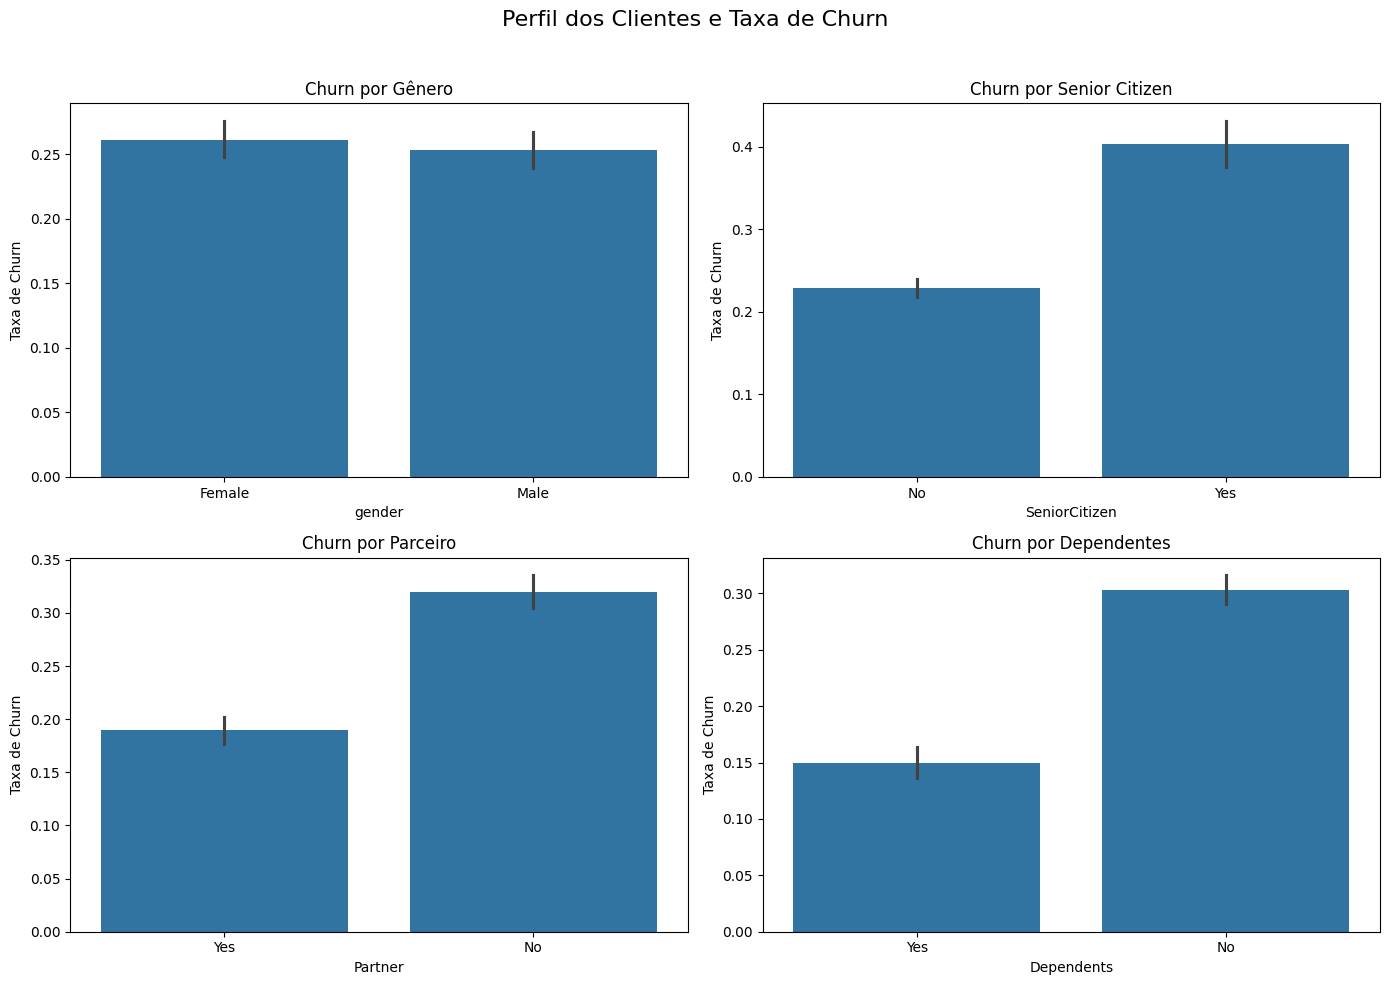

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

variaveis = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
titulos = [
    'Churn por Gênero',
    'Churn por Senior Citizen',
    'Churn por Parceiro',
    'Churn por Dependentes'
]

for ax, var, titulo in zip(axes, variaveis, titulos):
    sns.barplot(
        data=clientes,
        x=var,
        y=(clientes['Churn'] == 'Yes'),
        ax=ax
    )
    ax.set_title(titulo)
    ax.set_ylabel('Taxa de Churn')
    ax.set_xlabel(var)

plt.suptitle('Perfil dos Clientes e Taxa de Churn', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **2.3 - Gráficos dos Questionamentos**

### **1º Questionamento:** Qual a quantidade de clientes com Churn?

In [53]:
# SE ESSA LINHA DE CÓDIGO RETORNAR DIFERENTE DE Y E N, EXECUTAR A LINHA DE CÓDIGO DE CHURN (EM 1.3) E DEPOIS ESSA.
quantidade_clientes = (clientes['Churn'].value_counts().reset_index())

quantidade_clientes.columns = ['Churn', 'Quantidade']

quantidade_clientes

,Churn,Quantidade
0,No,5398
1,Yes,1869


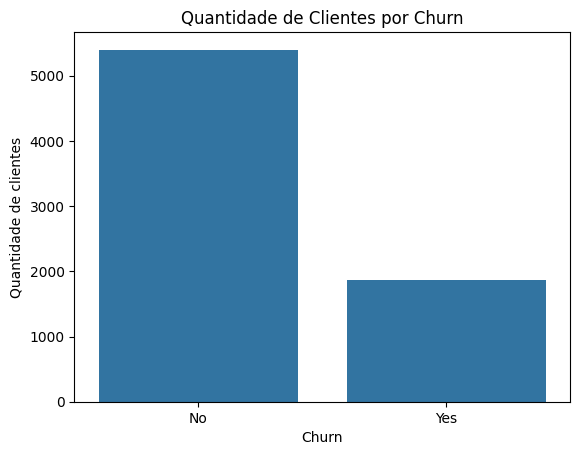

In [55]:
sns.countplot(data=clientes, x='Churn')
plt.title('Quantidade de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de clientes')
plt.show()

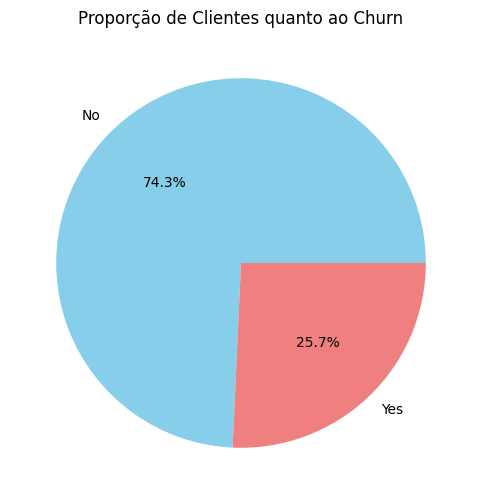

In [56]:
# Cria uma tabela que calcula a proporção de adesão ao cashback
# value_counts conta a quantidade de respostas (normalize = True  traz o resultado em formato de porcentagem)
qtd_clientes = clientes['Churn'].value_counts(normalize=True)

# Visualização plt.pie é um grafico de pizza
# autopct='%1.1f%%' traz a porcentagem com 1 casa decimal

plt.figure(figsize=(6, 6))
plt.pie(qtd_clientes, labels=qtd_clientes.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Proporção de Clientes quanto ao Churn')
plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---
**1869** clientes com Churn Yes e **5398** com Churn No

### **2º Questionamento:** Qual é o perfil dos clientes que tem Churn Yes?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "perfil_clientes" e quero construir um visual de gráfico de barras empilhadas que apresente a quantidade de Churn em relação ao perfil dos clientes. Em "perfil_clientes", temos as variaveis: SeniorCitizen: com Yes ou No Dependents: com Yes ou No Partner: com Yes ou No Desejo criar uma visualização que apresente o Churn Yes, agrupando por cada perfil variavel do perfil_clientes. Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

In [235]:
perfil_clientes = (clientes.loc[clientes['Churn'] == 'Yes',['SeniorCitizen', 'Partner', 'Dependents']])

perfil_clientes = (perfil_clientes.melt(var_name='Variavel', value_name='Resposta').value_counts().reset_index(name='Quantidade'))

#perfil_clientes

perfil_pivot = (perfil_clientes.pivot(index='Variavel', columns='Resposta', values='Quantidade').fillna(0).reindex(columns=['No', 'Yes'], fill_value=0))

perfil_pivot

Resposta,No,Yes
Variavel,,
Dependents,1543,326
Partner,1200,669
SeniorCitizen,1393,476


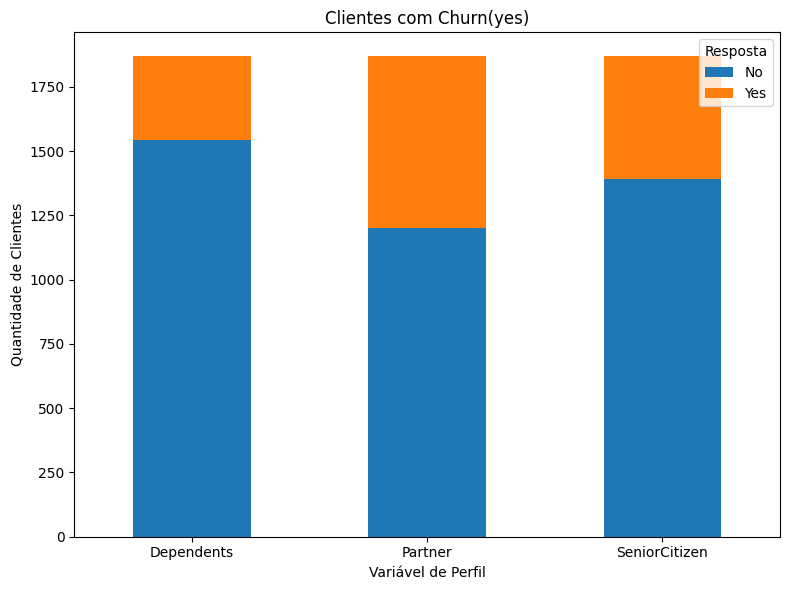

In [208]:
import matplotlib.pyplot as plt

perfil_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6)
)

plt.title('Clientes com Churn(yes)')
plt.xlabel('Variável de Perfil')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Resposta')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---
Dos **1869** clientes com Churn, percebe-se que **maioria** não tem dependentes, não tem parceiros e tem menos de 65 anos de idade.

### **3º Questionamento:** O tenure impacta no índice de Churn? Existe algum péríodo em que é maior o índice de Churn?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Com o DataFrame "clientes", quero construir um visual de gráfico de linha que apresente a faixa de tenure em que começa a ocorrer mais Churn.

Em "clientes", temos as colunas:
* tenure: com números int64
* Churn: como categoria

Desejo criar uma visualização que apresente o churn yes pelas faixas de tenure para entender a partir de qual faixa de tenure a quantidade de churn aumenta.

Primeiro, agrupe os dados por faixa e depois crie uma nova coluna chamada "faixa" que receba o período de cada faixa. Utilize a coluna "tenure" para o agrupamento dos dados e construção do gráfico. No eixo y devemos ter a quantidade de clientes. A linha do grafico deve mostrar a evolução do churn yes por tenure

```
faixas = {
    '0–6 meses',
    '7–12 meses',
    '13–24 meses',
    '25–48 meses',
    '49+ meses
}
```

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

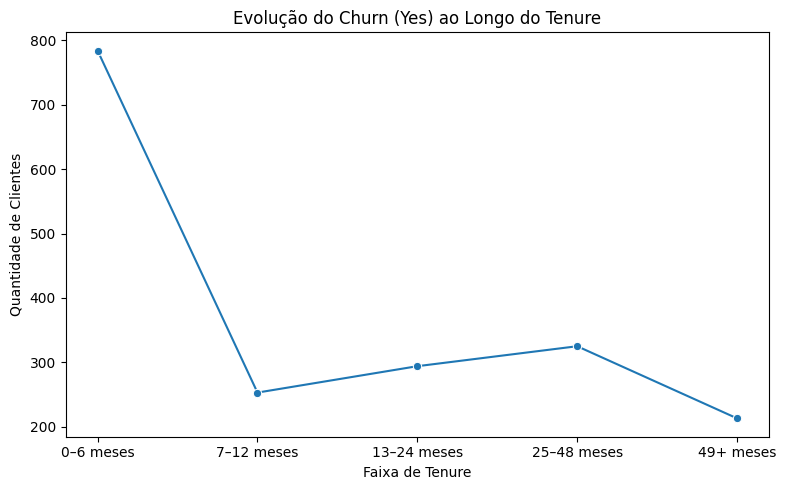

In [64]:
plt.figure(figsize=(8, 5))

sns.lineplot(
    data=churn_por_faixa,
    x='faixa',
    y='Quantidade',
    marker='o'
)

plt.title('Evolução do Churn (Yes) ao Longo do Tenure')
plt.xlabel('Faixa de Tenure')
plt.ylabel('Quantidade de Clientes')

plt.tight_layout()
plt.show()

<font color="7b71ff" size=4> Comentários: </font>

---
Percebe-se que a maior parte dos clientes com Churn se acontecem entre **0-6 meses** de tenure

### **4º Questionamento:** Qual serviço de internet é mais contratado? Qual serviço de "internet" possui maior índice de Churn?

In [67]:
internet_churn = (
    clientes.loc[clientes['Churn'] == 'Yes', 'InternetService'].value_counts().reset_index()
)

internet_churn.columns = ['InternetService', 'Quantidade']
internet_churn


,InternetService,Quantidade
0,Fiber optic,1297
1,DSL,459
2,No,113


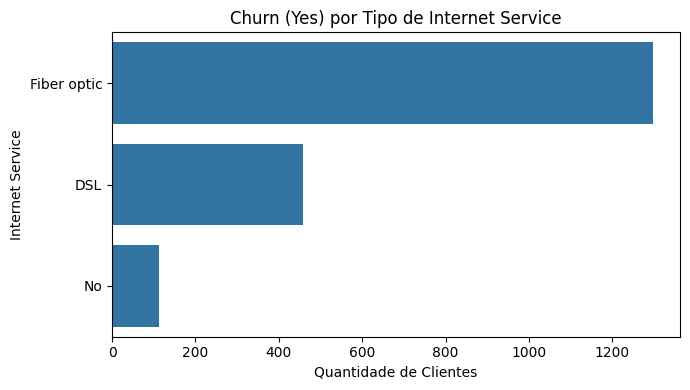

In [68]:
import seaborn as sns

plt.figure(figsize=(7, 4))

sns.barplot(
    data=internet_churn,
    x='Quantidade',
    y='InternetService'
)

plt.title('Churn (Yes) por Tipo de Internet Service')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Internet Service')

plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---
Observa-se que **o maior volume de churn** ocorre entre clientes que utilizam **Fiber Optic**.

### **5º Questionamento:** Qual é o impacto dos serviços de internet no índice de  Churn?

In [335]:
servicos = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

dados = clientes[servicos + ['Churn']].melt(
    id_vars='Churn',
    var_name='Servico',
    value_name='Status'
)

# Considerar apenas clientes que possuem o serviço
dados = dados[dados['Status'] == 'Yes']

taxa_churn = (
    dados
    .groupby('Servico')
    .agg(
        Total_Clientes=('Churn', 'count'),
        Churn_Yes=('Churn', lambda x: (x == 'Yes').sum())
    )
    .reset_index()
)

taxa_churn['Taxa_Churn_%'] = (
    taxa_churn['Churn_Yes'] / taxa_churn['Total_Clientes'] * 100
)

taxa_churn


,Servico,Total_Clientes,Churn_Yes,Taxa_Churn_%
0,DeviceProtection,2491,545,21.878764
1,OnlineBackup,2504,523,20.886581
2,OnlineSecurity,2078,295,14.196343
3,StreamingMovies,2816,818,29.048295
4,StreamingTV,2790,814,29.175627
5,TechSupport,2104,310,14.733840


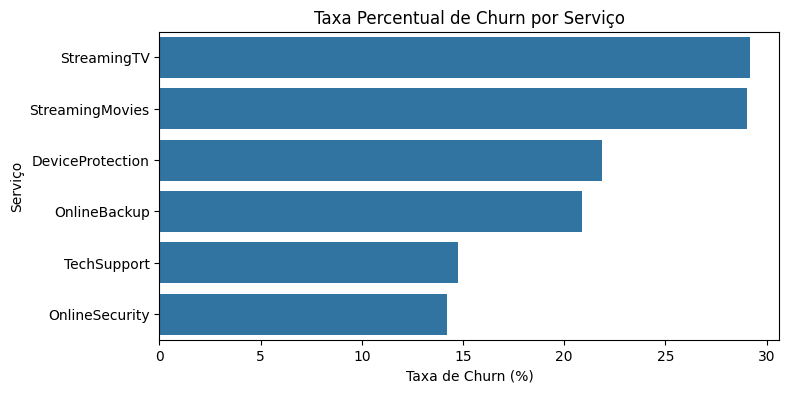

In [338]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=taxa_churn.sort_values('Taxa_Churn_%', ascending=False),
    x='Taxa_Churn_%',
    y='Servico'
)

plt.title('Taxa Percentual de Churn por Serviço')
plt.xlabel('Taxa de Churn (%)')
plt.ylabel('Serviço')
plt.show()


### **6º Questionamento:** Qual é o perfil de churn quanto ao tipo de contrato e método de pagamento?

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Temos um DataFrame chamado "clientes" e queremos construir um visual de gráfico de barras empilhadas que apresente as vendas por trimestre em relação ao método de pagamento da Zoop.

Em "clientes", temos as colunas:
* contract: com o tipo de contrato
* metodo_pagamento: com o método de pagamento escolhido na compra
* faturamento: com os valores das vendas

Quero criar uma visualização que apresente as mensalidades por trimestre, agrupando os métodos de pagamento de cada faixa de tenure correspondente a cada faixa de tenure.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização.

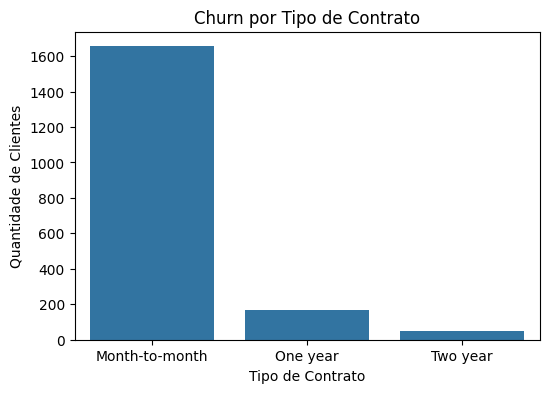

In [73]:
churn_contrato = (
    clientes[clientes['Churn'] == 'Yes']
    .groupby('Contract')
    .size()
    .reset_index(name='Quantidade')
)


plt.figure(figsize=(6, 4))
sns.barplot(
    data=churn_contrato,
    x='Contract',
    y='Quantidade'
)

plt.title('Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---
**Month-to-month** concentra a maior parte do churn

**Contratos anuais** ou **bienais** apresentam churn muito menor


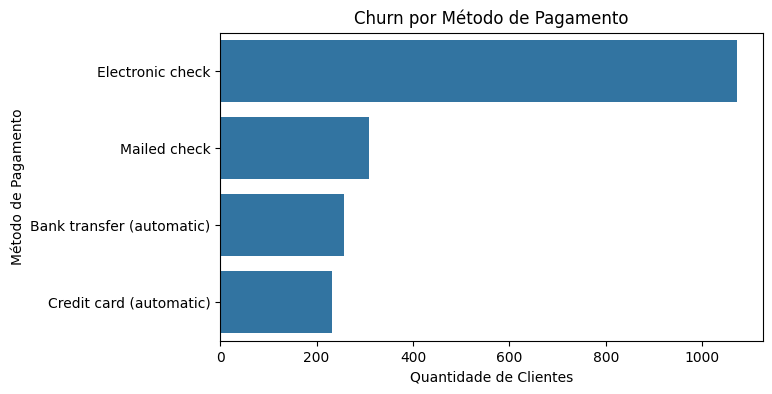

In [74]:
churn_pagamento = (
    clientes[clientes['Churn'] == 'Yes']
    .groupby('PaymentMethod')
    .size()
    .reset_index(name='Quantidade')
)

plt.figure(figsize=(7, 4))
sns.barplot(
    data=churn_pagamento.sort_values('Quantidade', ascending=False),
    y='PaymentMethod',
    x='Quantidade'
)

plt.title('Churn por Método de Pagamento')
plt.xlabel('Quantidade de Clientes')
plt.ylabel('Método de Pagamento')
plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---
Métodos automáticos (cartão/débito) apresentam menor evasão
**Electronic check** concentra a maior parte do churn

**Métodos automáticos(cartão/débito)** apresentam churn muito menor

➡️ Pagamentos manuais indicam menor fidelização


### **7º Questionamento:** Clientes que churnam pagam mais ou menos por mês?

/tmp/ipython-input-3663082842.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('faixa_tenure')['Charges.Monthly']


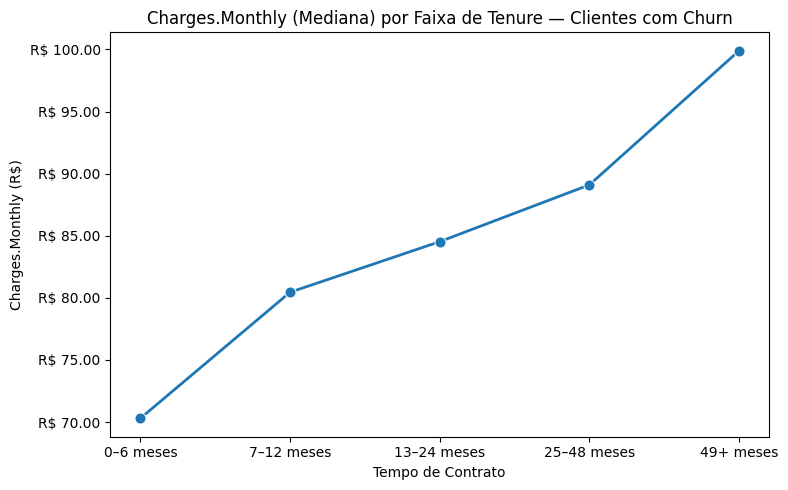

In [75]:
import matplotlib.ticker as mtick

# Filtrar apenas clientes com Churn = Yes
clientes_churn = clientes[clientes['Churn'] == 'Yes'].copy()

# Definir faixas de tenure
bins = [0, 6, 12, 24, 48, clientes_churn['tenure'].max()]
labels = [
    '0–6 meses',
    '7–12 meses',
    '13–24 meses',
    '25–48 meses',
    '49+ meses'
]

clientes_churn['faixa_tenure'] = pd.cut(
    clientes_churn['tenure'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Agrupar por faixa e calcular a MEDIANA de Charges.Monthly
charges_por_faixa = (
    clientes_churn
    .groupby('faixa_tenure')['Charges.Monthly']
    .median()
    .reset_index()
)

# Criar o gráfico de linha com markers
plt.figure(figsize=(8, 5))

ax = sns.lineplot(
    data=charges_por_faixa,
    x='faixa_tenure',
    y='Charges.Monthly',
    marker='o',
    markersize=8,
    linewidth=2
)

# 5️⃣ Formatar eixo Y para Reais (R$) com 2 casas decimais
ax.yaxis.set_major_formatter(
    mtick.StrMethodFormatter('R$ {x:,.2f}')
)

# 6️⃣ Ajustes finais do gráfico
plt.title('Charges.Monthly (Mediana) por Faixa de Tenure — Clientes com Churn')
plt.xlabel('Tempo de Contrato')
plt.ylabel('Charges.Monthly (R$)')
plt.tight_layout()
plt.show()


<font color="7b71ff" size=4> Comentários: </font>

---
O valor pago pelos clientes com Churn **aumenta** conforme o tempo de contrato, reforçando que clientes de maior valor permanecem pagando mensalidades elevadas até o momento da evasão, sem sinais prévios de redução de consumo.

# <strong><font color="2973B2">Definindo as cores do projeto</font></strong>

---

## **3.1 - Adicionando rótulos e labels**

---


7 visuais ja criados.Padronizar cores, rótulos dos dados, títulos e labels dos eixos.




In [115]:
# Adicionando as cores como variáveis do projeto

BEGE_1, BEGE_2, BEGE_3, BEGE_4 ="#FAEAB1", "#E5BA73", "#E5E5CB", "#FAF8F1"
PURPLE_1, PURPLE_2, PURPLE_3, PURPLE_4 = "#6528F7", "#A076F9", "#D7BBF5","#EDE4FF"
AZUL_1, AZUL_2, AZUL_3, AZUL_4 = "#0A2647", "#144272", "#205295", "#2C74B3"
VERDE_1,VERDE_2, VERDE_3, VERDE_4 = "#2C3333", "#2E4F4F", "#0E8388","#CBE4DE"

### **Gráfico 1 - Proporção de Clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

Gráfico de rosca que produzimos para a proporção de usuários aderindo ao programa de cashback.

O nosso gráfico precisa seguir a identidade visual, com o fundo da figura e do plot na cor BEGE_4 , a cor da fatia de valor "Não" igual a BEGE_3, a cor da fatia de valor "Sim" igual a AZUL_4  e o tamanho da figura deve ser de (6, 6).

O título da figura é "Clientes com Churn" com tamanho 18 e sua cor AZUL_1.

Os rótulos das fatias precisam ter a mesma cor das fatias e tamanho 12 e as porcentagens precisam estar na cor BEGE_1, também com tamanho 12.

A propriedade da largura da rosca (`wedgeprops`) precisa ser de 0.4, a posição das porcentagens dentro da fatia (`pctdistance`) precisa ser de 0.8, o ângulo de início de 180 (`startangle`) e sem explosão de fatias.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

In [141]:
# Total de clientes
total_clientes = quantidade_clientes['Quantidade'].sum()

clientes_churn_yes = (quantidade_clientes.loc[quantidade_clientes['Churn'] == 'Yes', 'Quantidade'].iloc[0])


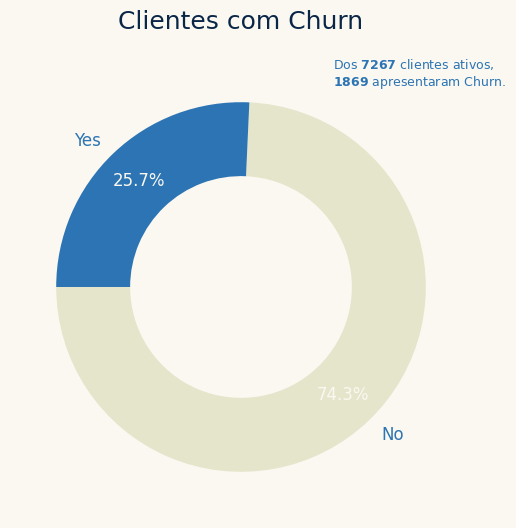

In [331]:
# Proporção de clientes com Churn
qtd_clientes = clientes['Churn'].value_counts(normalize=True)

# Garantir a ordem correta: Não, Sim
qtd_clientes = qtd_clientes.reindex(['No', 'Yes'])

# Cores das fatias
cores = [BEGE_3, AZUL_4]

# Criar figura
fig, ax = plt.subplots(figsize=(6, 6), facecolor=BEGE_4)
ax.set_facecolor(BEGE_4)

# Gráfico de rosca
wedges, texts, autotexts = ax.pie(
    qtd_clientes,
    labels=qtd_clientes.index,
    colors=cores,
    autopct='%1.1f%%',
    startangle=180,
    pctdistance=0.8,
    wedgeprops=dict(width=0.4),
    textprops=dict(fontsize=12)
)

# Ajustar cor dos rótulos para combinar com as fatias
for text, color in zip(texts, cores):
    text.set_color(AZUL_4)
    text.set_fontsize(12)

# Ajustar cor e tamanho das porcentagens
for autotext in autotexts:
    autotext.set_color(BEGE_4)
    autotext.set_fontsize(12)

# Título
ax.set_title(
    'Clientes com Churn',
    fontsize=18,
    color=AZUL_1,
    pad=20
)

# Adicionar texto dentro da área do plot
ax.text(
    0.7, 1.0,
    f"Dos $\\bf{total_clientes}$ clientes ativos,\n$\\bf{clientes_churn_yes}$ apresentaram Churn.",
    transform=ax.transAxes,
    ha='left',
    va='top',
    fontsize=9,
    color=AZUL_4,
)


plt.show()


In [424]:
def prop_clientes():
  # Proporção de clientes com Churn
  qtd_clientes = clientes['Churn'].value_counts(normalize=True)

  # Garantir a ordem correta: Não, Sim
  qtd_clientes = qtd_clientes.reindex(['No', 'Yes'])

  # Cores das fatias
  cores = [BEGE_3, AZUL_4]

  # Criar figura
  fig, ax = plt.subplots(figsize=(6, 6), facecolor=BEGE_4)
  ax.set_facecolor(BEGE_4)

  # Gráfico de rosca
  wedges, texts, autotexts = ax.pie(
      qtd_clientes,
      labels=qtd_clientes.index,
      colors=cores,
      autopct='%1.1f%%',
      startangle=180,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(fontsize=12)
  )

  # Ajustar cor dos rótulos para combinar com as fatias
  for text, color in zip(texts, cores):
      text.set_color(AZUL_4)
      text.set_fontsize(12)

  # Ajustar cor e tamanho das porcentagens
  for autotext in autotexts:
      autotext.set_color(BEGE_4)
      autotext.set_fontsize(12)

  # Título
  ax.set_title(
      'Clientes com Churn',
      fontsize=18,
      color=AZUL_1,
      pad=20
  )

  # Adicionar texto dentro da área do plot
  ax.text(
      0.7, 1.0,
      f"Dos $\\bf{total_clientes}$ clientes ativos,\n$\\bf{clientes_churn_yes}$ apresentaram Churn.",
      transform=ax.transAxes,
      ha='left',
      va='top',
      fontsize=9,
      color=AZUL_4,
  )
  return plt

### **Gráfico 2 - Perfil de Clientes**

> #### <strong><font color="7b71ff" size =6>Prompt:</font></strong>

O gráfico precisa seguir a identidade visual, com o fundo da figura e do plot na cor BEGE_4, as colunas na cor PURPLE_1 e o tamanho da figura deve ser de (8, 5).

O título da figura é "Perfil dos clientes com Churn" com tamanho 18 e sua cor AZUL_4.

Os rótulos do eixo y (yticks) devem ser suprimidos assim como o label do eixo y (ylabel) e os rótulos e label do eixo X (xticks e xlabel) devem ter tamanho 12 com a cor BEGE_1. As bordas do topo, lado direito e esquerdo do gráfico devem ser suprimidas.

Além disso, é necessário exibir o total de cada método de pagamento acima de cada coluna, com o texto também na cor PURPLE_4 e tamanho 9.

Utilize as bibliotecas de visualização de dados do Python para criar essa visualização. Lembre-se que as variáveis das cores que estamos utilizando possui valores de cores já em hexadecimal.

In [426]:
def perfil_clientes():
  # A variável perfil_pivot já está disponível globalmente, não é necessário recriá-la.

  # Figura
  fig, ax = plt.subplots(figsize=(8, 5), facecolor=BEGE_4)
  ax.set_facecolor(BEGE_4)

  # Barras empilhadas
  perfil_pivot.plot(
      kind='bar',
      stacked=True,
      ax=ax,
      color=[BEGE_3, AZUL_4],
      width=0.7
  )

  # Título
  ax.set_title(
      "Perfil dos clientes por Churn",
      fontsize=13,
      color=AZUL_1,
      pad=12
  )

  # Limpeza dos eixos
  ax.set_yticks([])
  ax.set_ylabel("")
  ax.set_xlabel("")
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_4, rotation=0)

  for spine in ['top', 'right', 'left']:
      ax.spines[spine].set_visible(False)

  # ===== ANOTAÇÕES COM SETAS =====
  for i, (no, yes) in enumerate(zip(perfil_pivot['No'], perfil_pivot['Yes'])):

      # Centro da parte "No"
      y_no = no / 2

      ax.annotate(
          f"{int(no)}",
          xy=(i, y_no),
          xytext=(i , y_no),
          textcoords='data',
          ha='center',
          va='center',
          fontsize=12,
          color=BEGE_4,
          arrowprops=dict(
              arrowstyle='->',
              color=AZUL_4,
              lw=1
          )
      )

      # Centro da parte "Yes"
      y_yes = no + (yes / 2)

      ax.annotate(
          f"{int(yes)}",
          xy=(i, y_yes),
          xytext=(i , y_yes),
          textcoords='data',
          ha='right',
          va='center',
          fontsize=12,
          color=AZUL_2,
          arrowprops=dict(
              arrowstyle='-',
              color=AZUL_2,
              lw=0
          )
      )

  # Legenda opcional
  ax.legend(
      title="Churn",
      frameon=False,
      fontsize=9,
      title_fontsize=9,
      loc='upper right',
      bbox_to_anchor=(1.02, 1)
  )

  plt.tight_layout()
  return plt

### **Gráfico 3 - Churn por Tenure**

In [373]:
def tenure():
  plt.figure(figsize=(8, 5), facecolor=BEGE_4)
  ax = plt.gca()
  ax.set_facecolor(BEGE_4)

  # Lineplot
  sns.lineplot(
      data=churn_por_faixa,
      x='faixa',
      y='Quantidade',
      marker='o',
      color=PURPLE_3,
      linewidth=2,
      markersize=6,
      ax=ax
  )

  # Título e eixo X
  plt.title(
      'Clientes com Churn ao Longo do Tenure',
      fontsize=13,
      color=AZUL_1,
      pad=15
  )

  plt.xlabel(
      '',
      fontsize=12,
      color=BEGE_1
  )

  # Remover ylabel
  plt.ylabel("")

  # Estilo dos ticks
  ax.tick_params(axis='x', labelsize=9, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=12, colors=BEGE_4)

  # Remover bordas
  for spine in ['left', 'top', 'right']:
      ax.spines[spine].set_visible(False)

  # ===== CÍRCULOS + VALORES =====
  for i, row in churn_por_faixa.iloc[:5].iterrows():
      x = row['faixa']
      y = row['Quantidade']


      # Texto à esquerda do círculo (Quantidade)
      ax.annotate(
          int(y),
          xy=(x, y),
          xytext=(10, 20),
          textcoords='offset points',
          ha='right',
          va='center',
          fontsize=9,
          color=AZUL_1
      )

  # ===== LEGENDA TEXTUAL =====
  ax.text(
      0.6, 0.6,
      "Clientes com até 6 meses de Tenure\napresentam maior chance de Churn",
      transform=ax.transAxes,
      ha='left',
      va='top',
      fontsize=9,
      color=AZUL_1
  )

  plt.tight_layout()
  return plt

### **Gráfico 4 - Churn por Tipo de Internet**

In [417]:
def internet():
  plt.figure(figsize=(7, 4), facecolor=BEGE_4)
  ax = plt.gca()
  ax.set_facecolor(BEGE_4)

  # Barras horizontais
  sns.barplot(
      data=internet_churn,
      x='Quantidade',
      y='InternetService',
      color=AZUL_4,
      ax=ax
  )

  # Título
  plt.title(
      'Clientes com Churn em\ncada tipo de Internet',
      fontsize=13,
      color=AZUL_1,
      pad=15
  )

  # Label do eixo X
  plt.xlabel(
      'Quantidade de Clientes',
      fontsize=0,
      color=BEGE_1
  )

  # Remover ylabel
  plt.ylabel("")

  # Estilo dos ticks
  ax.tick_params(axis='x', labelsize=0, colors=BEGE_1)
  ax.tick_params(axis='y', labelsize=9, colors=AZUL_1)

  # Remover bordas
  for spine in ['left', 'top', 'right', 'bottom']:
      ax.spines[spine].set_visible(False)

  # ==============================
  # VALORES AO LADO DE CADA BARRA
  # ==============================
  max_valor = internet_churn['Quantidade'].max()

  for i, valor in enumerate(internet_churn['Quantidade']):
      ax.text(
          valor + max_valor * 0.02,  # espaçamento proporcional
          i,
          f'{valor}',
          va='center',
          fontsize=10,
          color=AZUL_1
      )

  plt.tight_layout()
  return plt


### **Gráfico 5 - Churn por Serviços adicionais de internet**

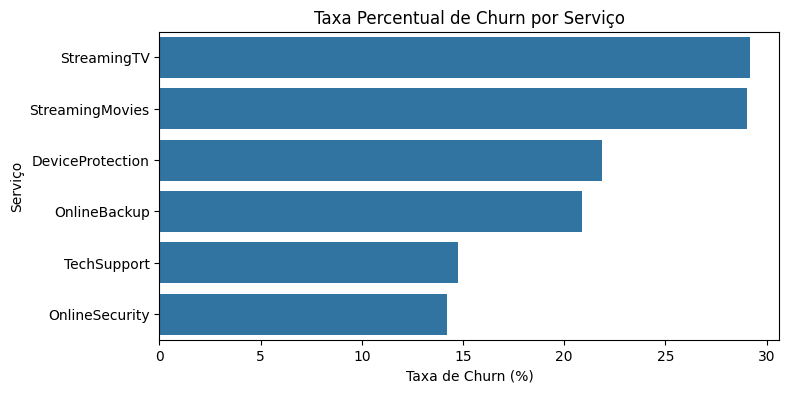

In [407]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=taxa_churn.sort_values('Taxa_Churn_%', ascending=False),
    x='Taxa_Churn_%',
    y='Servico'
)

plt.title('Taxa Percentual de Churn por Serviço')
plt.xlabel('Taxa de Churn (%)')
plt.ylabel('Serviço')
plt.show()

### **Gráfico 6 - Churn por Tipo de Contrato**

In [428]:
def contrato():
  plt.figure(figsize=(6, 4), facecolor=BEGE_4)
  ax = plt.gca()
  ax.set_facecolor(BEGE_4)

  # Barras verticais
  sns.barplot(
      data=churn_contrato,
      x='Contract',
      y='Quantidade',
      color=AZUL_4,
      ax=ax
  )

  # Título
  plt.title(
      'Tipo de Contrato com maior Churn',
      fontsize=13,
      color=AZUL_1,
      pad=15
  )

  # Labels
  plt.xlabel("")

  plt.ylabel("")  # remover ylabel

  # Estilo dos ticks
  ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=0, colors=BEGE_1)

  # Remover bordas esquerda, superior e direita
  for spine in ['left', 'top', 'right']:
      ax.spines[spine].set_visible(False)

  # ==============================
  # VALORES NO TOPO DE CADA BARRA
  # ==============================
  max_valor = churn_contrato['Quantidade'].max()

  for i, valor in enumerate(churn_contrato['Quantidade']):
      ax.text(
          i,
          valor + max_valor * 0.03,
          f'{valor}',
          ha='center',
          fontsize=10,
          color=AZUL_1
      )

  ax.text(
      0.5, 0.7,
      "Contratos mensais apresentam até\n30x mais churn comparados\na contratos de 2 anos.",
      transform=ax.transAxes,
      ha='left',
      va='top',
      fontsize=9,
      color=AZUL_1
  )

  plt.tight_layout()
  return plt

### **Gráfico 7 - Churn Charges.Monthly Tenure**

In [396]:
def mensalidade():
  plt.figure(figsize=(8, 5), facecolor=BEGE_4)
  ax = plt.gca()
  ax.set_facecolor(BEGE_4)

  # Lineplot
  sns.lineplot(
      data=charges_por_faixa,
      x='faixa_tenure',
      y='Charges.Monthly',
      marker='o',
      markersize=6,
      linewidth=2,
      color=PURPLE_3,
      ax=ax
  )

  # Título e eixo X
  plt.title(
      'Evolução da média mensal ao longo\ndo tempo entre clientes com Churn',
      fontsize=13,
      color=AZUL_1,
      pad=15
  )

  # Remover labels
  plt.xlabel("")
  plt.ylabel("")

  # Formatar eixo Y para Reais
  ax.yaxis.set_major_formatter(
      mtick.StrMethodFormatter('R$ {x:,.2f}')
  )

  # Estilo dos ticks
  ax.tick_params(axis='x', labelsize=9, colors=AZUL_1)
  ax.tick_params(axis='y', labelsize=0, colors=BEGE_1)

  # Remover bordas
  for spine in ['left', 'top', 'right']:
      ax.spines[spine].set_visible(False)

  # ===== CÍRCULOS + VALORES =====
  for i, row in charges_por_faixa.iloc[:5].iterrows():
      x = row['faixa_tenure']
      y = row['Charges.Monthly']

      # Círculo
      circle = plt.Circle(
          (x, y),
          radius=200,
          fill=False,
          edgecolor=PURPLE_1,
          linewidth=1.5,
          alpha=0.6,
          transform=ax.transData
      )
      ax.add_patch(circle)

      # Valor à esquerda do ponto
      ax.annotate(
          f"R$ {y:,.2f}",
          xy=(x, y),
          xytext=(-18, 0),
          textcoords='offset points',
          ha='right',
          va='center',
          fontsize=9,
          color=PURPLE_1
      )

  # ===== LEGENDA TEXTUAL ANALÍTICA =====
  ax.text(
      0.7, 0.3,
      "Observa-se aumento progressivo\nda média mensal ao longo do\nTenure, enquanto o churn se\nconcentra nas faixas iniciais.",
      transform=ax.transAxes,
      ha='left',
      va='top',
      fontsize=9,
      color=AZUL_1
  )

  plt.tight_layout()
  return plt

# <strong><font color="2973B2">Exportando visuais</font></strong>

---

Ultima etapa: salvar as visualizações como imagem. Coloquei cada um dos gráficos gerados dentro de uma função e quero que seja aplicada a cada uma delas o seguinte procedimento:

```
nome_imagem = nome_funcao()
nome_imagem.savefig('nome_imagem.png', bbox_inches='tight')
nome_imagem.close()
```

As funções são:

*   prop_clientes()
*   perfil_clientes()
*   tenure()
*   internet()
*   contrato()
*   mensalidade()

Troque a variável `nome_imagem` por `grafico_` seguido do nome da função que gera o gráfico.

Utilize a linguagem Python para criar o código e não exiba as imagens.

In [429]:
def salvar_grafico(grafico, nome):
    imagem = grafico()
    imagem.savefig(f'{nome}.png', bbox_inches='tight')
    imagem.close()

salvar_grafico(prop_clientes, 'grafico_prop_clientes')
salvar_grafico(perfil_clientes, 'grafico_perfil_clientes')
salvar_grafico(tenure, 'grafico_tenure')
salvar_grafico(internet, 'grafico_internet')
salvar_grafico(contrato, 'grafico_contrato')
salvar_grafico(mensalidade, 'grafico_mensalidade')